In [ ]:
#Dataset Link: https://drive.google.com/file/d/1Jgtb03hYqQdZfD0wShjfBgRz8UA1xGWM/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#We have to forecast next 12 months passengers count based on the previous data

In [ ]:
df=pd.read_csv('/content/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [ ]:
#converting the months column to datetime format
df['Month']=pd.to_datetime(df['Month'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [ ]:
df

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
df.isnull().sum()

,0
Month,0
#Passengers,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.index=df['Month']

In [ ]:
df

,Month,#Passengers
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [ ]:
del df['Month']

In [ ]:
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<Axes: xlabel='Month'>

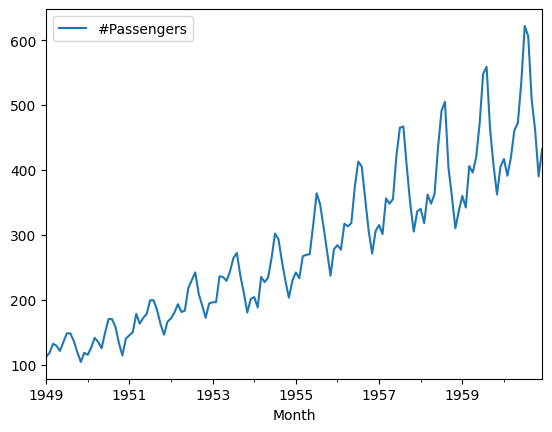

In [ ]:
df.plot()

In [ ]:
#Adfuller : test to check the stationarity of the series
#null hypo-> data is stationary
#alternate hypo-> data is not stationary

In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['#Passengers'])

p_val=result[1] #p-value
print(p_val)

0.991880243437641


In [ ]:
if (p_val<0.05):
  print("We accept the Null Hypothesis - Data is stationary")
else:
  print("We reject the Null Hypothesis - Data is not stationary")

We reject the Null Hypothesis - Data is not stationary


In [ ]:
#when data is not stationary, we perform De trend or transformation

In [ ]:
rolling_mean=df.rolling(window=12).mean() #taking 12 month period as window
rolling_mean_detrend=df-rolling_mean
#subtract the rolling mean from actual passenger values : remove trend

In [ ]:
rolling_mean_detrend.head(15)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


<Axes: title={'center': 'original data'}, xlabel='Month'>

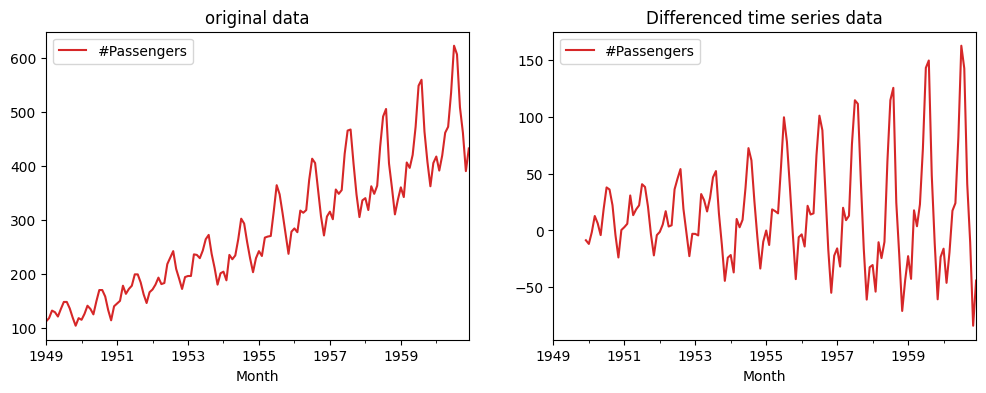

In [ ]:
ax1=plt.subplot(1,2,2)
rolling_mean_detrend.plot(figsize=(12,4), color="tab:red", title='Differenced time series data', ax=ax1)
ax2=plt.subplot(1,2,1)
df.plot(figsize=(12,4),color='tab:red',title='original data', ax=ax2)

In [ ]:
detrend_data=rolling_mean_detrend.dropna() #smaller datatset

In [ ]:
detrend_data

,#Passengers
Month,
1949-12-01,-8.666667
1950-01-01,-11.916667
1950-02-01,-1.583333
1950-03-01,12.666667
1950-04-01,6.166667
...,...
1960-08-01,142.666667
1960-09-01,40.916667
1960-10-01,-10.583333


In [ ]:
result1=adfuller(detrend_data['#Passengers'])
p_val2=result1[1]
print(p_val2)

0.022104139473878875


In [ ]:
if (p_val2<0.05):
  print("We accept the Null Hypothesis - Data is stationary")
else:
  print("We reject the Null Hypothesis - Data is not stationary")

We accept the Null Hypothesis - Data is stationary


In [ ]:
m=detrend_data.rolling(window=12).mean()
s=detrend_data.rolling(window=12).std()

Text(0.5, 1.0, 'Detrended Data with mean and std line')

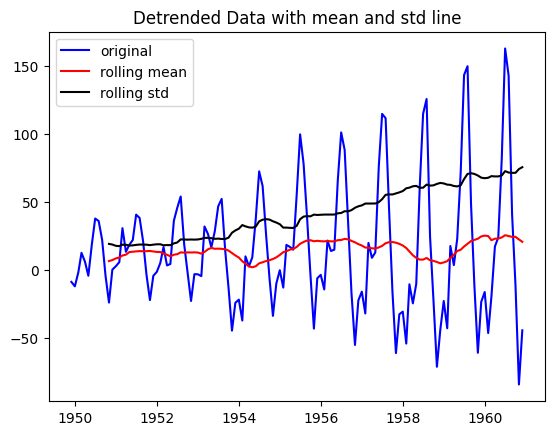

In [ ]:
plt.plot(detrend_data,color='blue',label='original')
plt.plot(m,color='red',label='rolling mean')
plt.plot(s,color='black',label='rolling std')
plt.legend(loc='best')
plt.title('Detrended Data with mean and std line')

In [ ]:
train=detrend_data[:120]['#Passengers']
test=detrend_data[120:]['#Passengers']

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#order=>(p=AR,d=differencing,q=MA)
model=ARIMA(train,order=(1,0,2))

model_fit=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
detrend_data['Predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1) #testing data

/tmp/ipython-input-1179692947.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detrend_data['Predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1) #testing data


In [ ]:
detrend_data.tail(12)

,#Passengers,Predict
Month,,
1960-01-01,-16.083333,-13.402469
1960-02-01,-46.166667,1.206088
1960-03-01,-19.250000,7.831010
1960-04-01,17.333333,10.835386
1960-05-01,24.000000,12.197859
1960-06-01,81.750000,12.815735
1960-07-01,162.583333,13.095940
1960-08-01,142.666667,13.223011
1960-09-01,40.916667,13.280638


<Axes: xlabel='Month'>

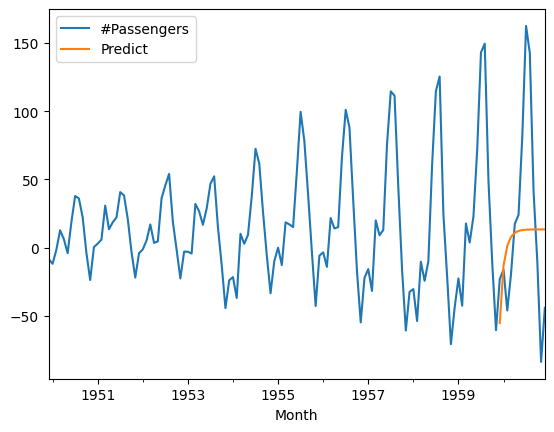

In [ ]:
detrend_data[['#Passengers','Predict']].plot()

In [ ]:
print(np.__version__)

1.26.4


In [ ]:
# !pip install numpy==1.26.4 pmdarima==2.0.4
#run this command, restart session and then comment and import auto_arima

In [ ]:
#AutoArima: finds the best model out of the time series model according to your dataset
from pmdarima import auto_arima

In [ ]:
auto=auto_arima(detrend_data['#Passengers'])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.12

In [ ]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  133
Model:               SARIMAX(3, 0, 2)   Log Likelihood                -612.905
Date:                Tue, 16 Sep 2025   AIC                           1239.810
Time:                        03:01:28   BIC                           1260.043
Sample:                    12-01-1949   HQIC                          1248.032
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.8579      1.701      4.033      0.000       3.525      10.191
ar.L1          0.8625      0.171      5.045      0.000       0.527       1.198
ar.L2          0.2071      0.236      0.878      0.380      -0.255       0.670
ar.L3         -0.5239      0.142     -3.683      0.000      -0.803      -0.245
ma.L1          0.0684      0.138      0.496      0.620      -0.202       0.338
ma.L2         -0.7564      0.091     -8.293      0.000      -0.935      -0.578
sigma2       577.4776     71.847      8.038      0.000     436.660     718.295
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 8.11
Prob(Q):                              0.89   Prob(JB):                         0.02
Heteroskedasticity (H):               6.21   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#According to autoarima SARIMAX(3,0,2)is the best model for the given dataset

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model=SARIMAX(train,order=(3,0,2),seasonal_order=(3,0,2,12)) #every 12 month pattern is repeating
model=model.fit()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary star

In [ ]:
detrend_data['Predict']=model.predict(start=len(train),end=len(train)+len(test)-1)

/tmp/ipython-input-1712126754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detrend_data['Predict']=model.predict(start=len(train),end=len(train)+len(test)-1)


<Axes: xlabel='Month'>

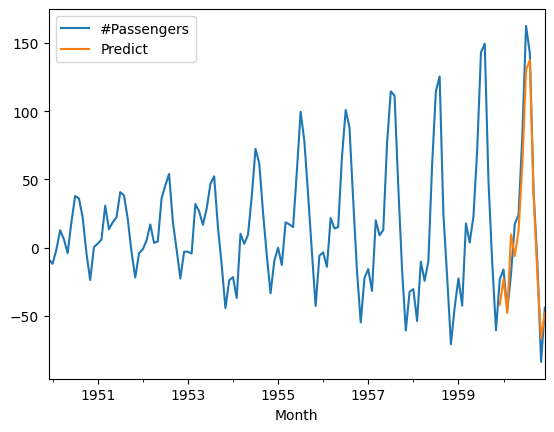

In [ ]:
detrend_data[['#Passengers','Predict']].plot()

In [ ]:
forecast=model.forecast(steps=48) #48=len(len(x_test)+future)

In [ ]:
forecast

,predicted_mean
1959-12-01,-42.011668
1960-01-01,-23.325939
1960-02-01,-47.993742
1960-03-01,9.597506
1960-04-01,-6.280826
1960-05-01,12.567501
1960-06-01,59.636339
1960-07-01,130.324231
1960-08-01,137.468830
1960-09-01,38.187274


<Axes: xlabel='Month'>

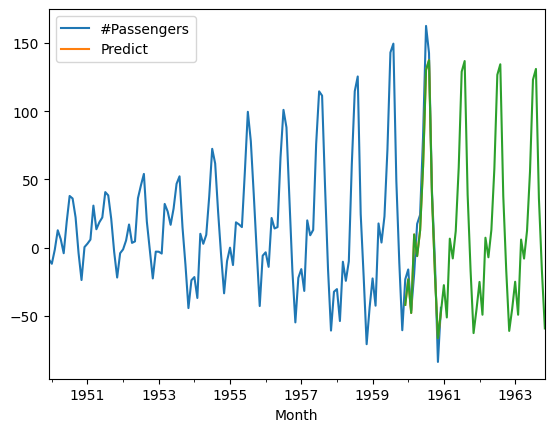

In [ ]:
detrend_data.plot()
forecast.plot()